[Скачать данные](https://gitlab.com/crossref/retraction-watch-data)

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [94]:
df = pd.read_csv('retraction_watch.csv')

## **Причины отзыва статьи с публикации**


Здесь я выбрал все причины которые относятся к кластеру 'Безграмотность работы с данными'

1. [Error in Analyses](https://retractionwatch.com/retraction-watch-database-user-guide/retraction-watch-database-user-guide-appendix-b-reasons/#:~:text=Error%20in%20Analyses,any%20calculation(s).)
2. [Error in Methods](https://retractionwatch.com/retraction-watch-database-user-guide/retraction-watch-database-user-guide-appendix-b-reasons/#:~:text=Error%20in%20Methods,experimental%20protocol(s).)
3. [Error in Results and/or Conclusions](https://retractionwatch.com/retraction-watch-database-user-guide/retraction-watch-database-user-guide-appendix-b-reasons/#:~:text=Error%20in%20Results,or%20the%20conclusions.)
4. [**Falsification/Fabrication of Data**](https://retractionwatch.com/retraction-watch-database-user-guide/retraction-watch-database-user-guide-appendix-b-reasons/#:~:text=Falsification/Fabrication%20of%20Data,in%20order%20to%20mislead.)
5. [**Falsification/Fabrication of Results**](https://retractionwatch.com/retraction-watch-database-user-guide/retraction-watch-database-user-guide-appendix-b-reasons/#:~:text=Falsification/Fabrication%20of%20Results,in%20order%20to%20mislead.)
6. [Manipulation of Data](https://retractionwatch.com/retraction-watch-database-user-guide/retraction-watch-database-user-guide-appendix-b-reasons/#:~:text=Manipulation%20of%20Data,of%20any%20data.)
7. [Manipulation of Results](https://retractionwatch.com/retraction-watch-database-user-guide/retraction-watch-database-user-guide-appendix-b-reasons/#:~:text=Manipulation%20of%20Results,of%20any%20results.)
8. [**Computer-Aided Content or Computer-Generated Content**](https://retractionwatch.com/retraction-watch-database-user-guide/retraction-watch-database-user-guide-appendix-b-reasons/#:~:text=Computer%2DAided%20Content,Mathgen%2C%20Scigen%2C%20ChatGPT.)
9. [Results Not Reproducible](https://retractionwatch.com/retraction-watch-database-user-guide/retraction-watch-database-user-guide-appendix-b-reasons/#:~:text=Results%20Not%20Reproducible,the%20original%20article.)

In [95]:
reasons = ['Error in Analyses'
           , 'Error in Methods'
           , 'Error in Results and/or Conclusions'
           , 'Falsification/Fabrication of Data'
           , 'Falsification/Fabrication of Results'
           , 'Manipulation of Data'
           , 'Manipulation of Results'
           #, 'Computer-Aided Content or Computer-Generated Content'
           , 'Results Not Reproducible']

df_with_my_reasons = df[df['Reason'].str.contains('|'.join(reasons), na=False)].copy(deep=True)

In [96]:
df_with_my_reasons['RetractionDate'] = pd.to_datetime(df_with_my_reasons['RetractionDate'])
df_with_my_reasons = df_with_my_reasons[df_with_my_reasons['RetractionDate'].dt.year.between(2000, 2026)].reset_index()

### Рассмотрим причину **Использование Ai**

In [97]:
df_ai = df_with_my_reasons[df_with_my_reasons['Reason'].str.contains('Computer-Aided Content or Computer-Generated Content', na=False)].copy(deep=True)

In [98]:
len(df_ai)

3

Всего в данных 3 отзыва публикации, при условии неграмотности данных **и использования Ai**. Поэтому данный факт далее не будем рассматривать.

**Почему я не считаю Ai как нергамотность данных**

Если я включу данную причину в анализ, оценка будет смещена, за счет исследований которые могут быть с **грамотным использованием данных**, но с использованием Ai, что противоречит моему исследованию. Рассмотрим данную ситуацию:

In [99]:
reasons = ['Error in Analyses'
           , 'Error in Methods'
           , 'Error in Results and/or Conclusions'
           , 'Falsification/Fabrication of Data'
           , 'Falsification/Fabrication of Results'
           , 'Manipulation of Data'
           , 'Manipulation of Results'
           , 'Computer-Aided Content or Computer-Generated Content'
           , 'Results Not Reproducible']

df_with_my_reasons_and_ai = df[df['Reason'].str.contains('|'.join(reasons), na=False)].copy(deep=True)

In [100]:
df_with_my_reasons_and_ai['RetractionDate'] = pd.to_datetime(df_with_my_reasons_and_ai['RetractionDate'])
df_with_my_reasons_and_ai = df_with_my_reasons_and_ai[df_with_my_reasons_and_ai['RetractionDate'].dt.year.between(2000, 2026)].reset_index()

/var/folders/m1/z8qkwrzs04n76tqxcvwb76dh0000gn/T/ipykernel_1106/1070777379.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(ax=axes[0]
/var/folders/m1/z8qkwrzs04n76tqxcvwb76dh0000gn/T/ipykernel_1106/1070777379.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(ax=axes[1]


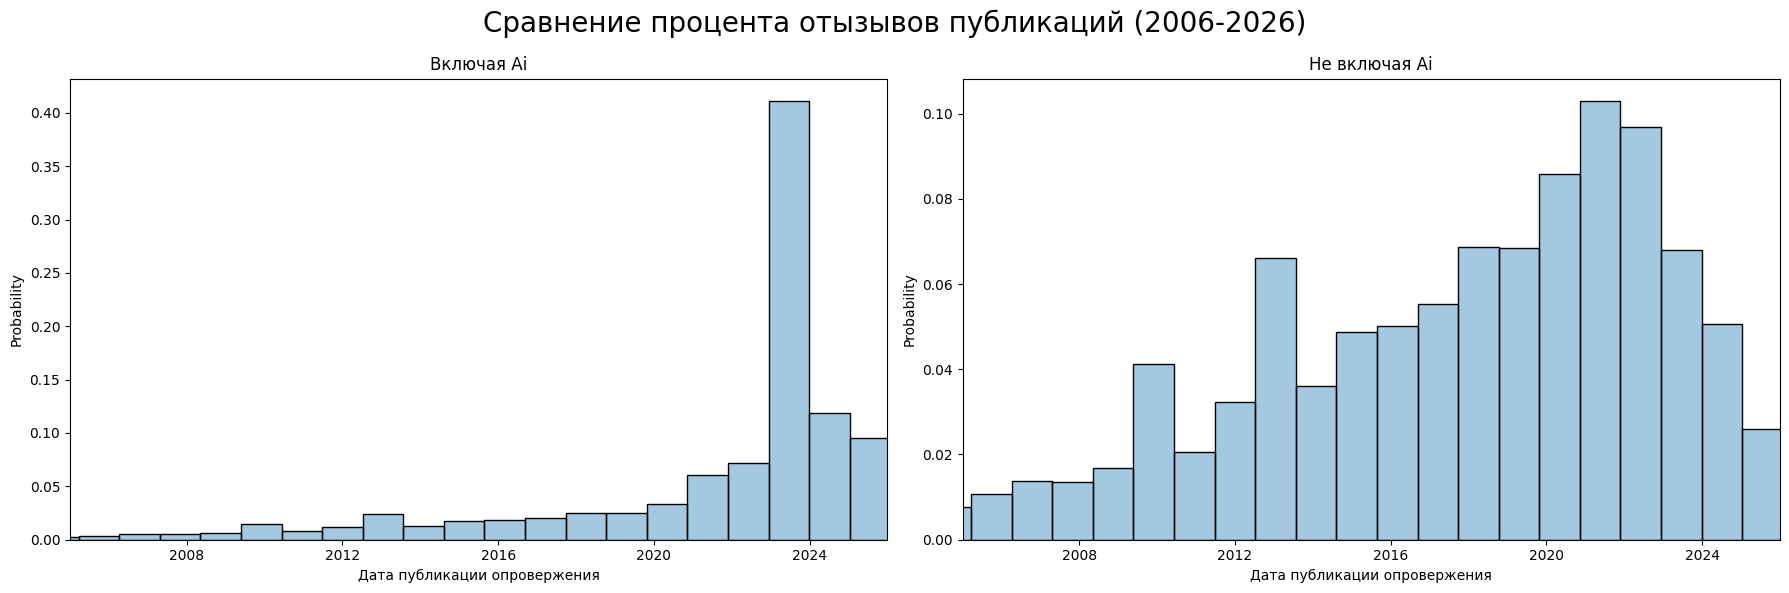

In [101]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# график 1
axes[0].set_xlim([pd.Timestamp('2005-01-01'), pd.Timestamp('2026-01-01')])
sns.histplot(ax=axes[0]
            , data=df_with_my_reasons_and_ai
            , x='RetractionDate'
            , alpha=0.4
            , stat='probability'
            , palette='deep'
            , bins=25)
axes[0].set_xlabel('Дата публикации опровержения')
axes[0].set_title('Включая Ai')

# график 2
axes[1].set_xlim([pd.Timestamp('2005-01-01'), pd.Timestamp('2026-01-01')])
sns.histplot(ax=axes[1]
            , data=df_with_my_reasons
            , x='RetractionDate'
            , alpha=0.4
            , stat='probability'
            , palette='deep'
            , bins=25)
axes[1].set_xlabel('Дата публикации опровержения')
axes[1].set_title('Не включая Ai')

fig.suptitle('Сравнение процента отызывов публикаций (2006-2026)', fontsize=20)
fig.tight_layout()

Связанно это с массовым использованием Ai при написании статей в 2024 году, что можно заметить на графике слева.

##

In [102]:
df_with_my_reasons['is_rus_author'] = df_with_my_reasons['Country'].str.contains('Russia', na=False).map({True: 'Включает Россию', False: 'Не включает Россию'})

/var/folders/m1/z8qkwrzs04n76tqxcvwb76dh0000gn/T/ipykernel_1106/3085773674.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(ax=axes[1]


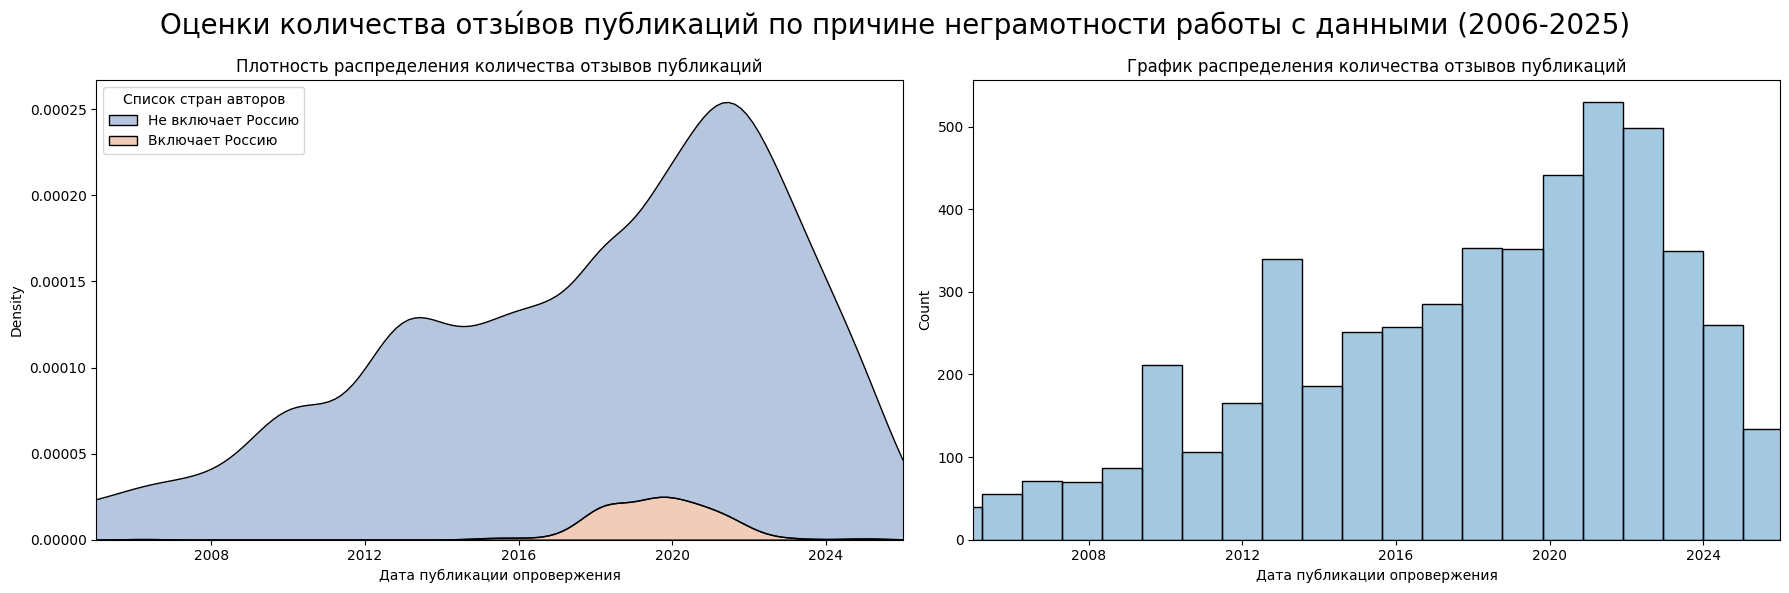

In [103]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# график 1
axes[0].set_xlim([pd.Timestamp('2005-01-01'), pd.Timestamp('2026-01-01')])
sns.kdeplot(ax=axes[0]
            , data=df_with_my_reasons
            , x='RetractionDate'
            , alpha=0.4
            , palette='deep'
            , multiple='stack'
            , hue='is_rus_author')
axes[0].set_xlabel('Дата публикации опровержения')
axes[0].set_title('Плотность распределения количества отзывов публикаций')
sns.move_legend(axes[0], 'upper left', title='Список стран авторов')

# график 2
axes[1].set_xlim([pd.Timestamp('2005-01-01'), pd.Timestamp('2026-01-01')])
sns.histplot(ax=axes[1]
            , data=df_with_my_reasons
            , x='RetractionDate'
            , alpha=0.4
            , palette='deep'
            , bins=25)
axes[1].set_xlabel('Дата публикации опровержения')
axes[1].set_title('График распределения количества отзывов публикаций')

fig.suptitle('Оценки количества отзы́вов публикаций по причине неграмотности работы с данными (2006-2025)', fontsize=20)
fig.tight_layout()

## Посмотрим также на

In [104]:
reasons = ['Error in Analyses'
           , 'Error in Methods'
           , 'Error in Results and/or Conclusions'
           , 'Falsification/Fabrication of Data'
           , 'Falsification/Fabrication of Results'
           , 'Manipulation of Data'
           , 'Manipulation of Results'
           , 'Results Not Reproducible']
df_without_reasons = df.copy(deep=True)
df_without_reasons['is_bad_data'] = df['Reason'].str.contains('|'.join(reasons), na=False)

In [105]:
df_without_reasons['RetractionDate'] = pd.to_datetime(df_without_reasons['RetractionDate'], format='%m/%d/%Y', exact=False)
df_without_reasons = df_without_reasons[df_without_reasons['RetractionDate'].dt.year.between(2000, 2026)].reset_index()

Text(0.5, 1.0, 'График плотности распределения количества отзывов публикаций')

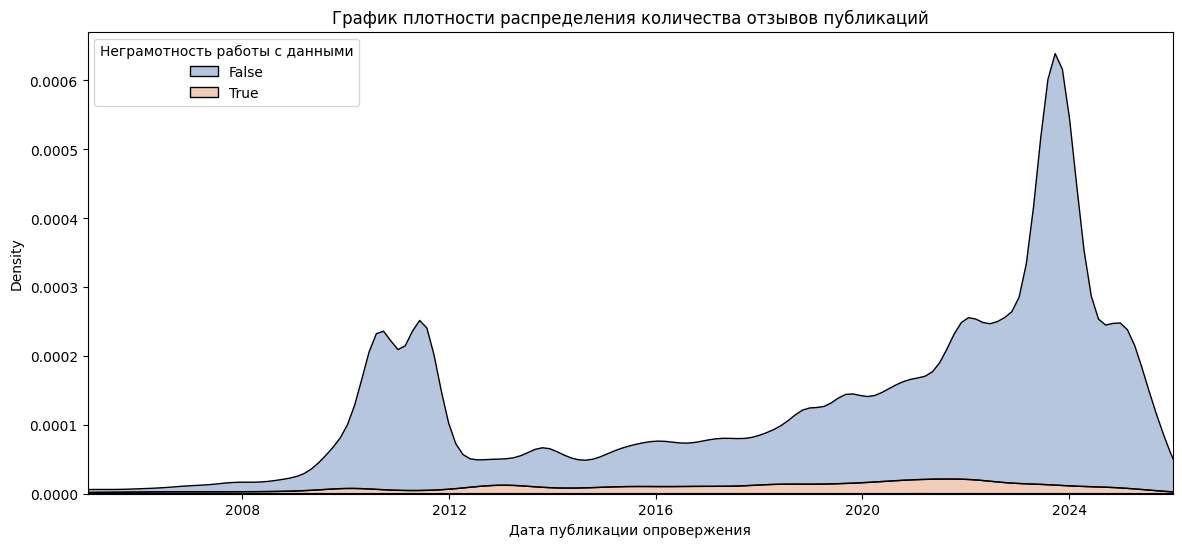

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))

# график 1
axes.set_xlim([pd.Timestamp('2005-01-01'), pd.Timestamp('2026-01-01')])
sns.kdeplot(ax=axes
            , data=df_without_reasons
            , x='RetractionDate'
            , hue='is_bad_data'
            , alpha=0.4
            , palette='deep'
            , multiple='stack'
            , bw_adjust=0.5)

sns.move_legend(axes, 'upper left', title='Неграмотность работы с данными')
axes.set_xlabel('Дата публикации опровержения')
axes.set_title('График плотности распределения количества отзывов публикаций')

Визуально хочется сказать что неграмотность работы с данными никуда не ушла, и что это давольно весомые причины отзыва публикации. Докажем на данных.

In [107]:
f'Процент отзыва публикаций по причине неграмотного использоваго данных: {round(sum(df_without_reasons['is_bad_data']) / len(df_without_reasons['is_bad_data']), 2) * 100}%'

'Процент отзыва публикаций по причине неграмотного использоваго данных: 8.0%'

In [108]:
import matplotlib.dates as mdates
from scipy.stats import linregress

df_monthly_ratio = df_without_reasons.groupby(df_without_reasons['RetractionDate'].dt.to_period('M'))['is_bad_data'].mean().reset_index()
df_monthly_ratio.columns = ['Month', 'BadDataRatio']
df_monthly_ratio['Month'] = df_monthly_ratio['Month'].dt.to_timestamp()

x = mdates.date2num(df_monthly_ratio['Month'])
y = df_monthly_ratio['BadDataRatio']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

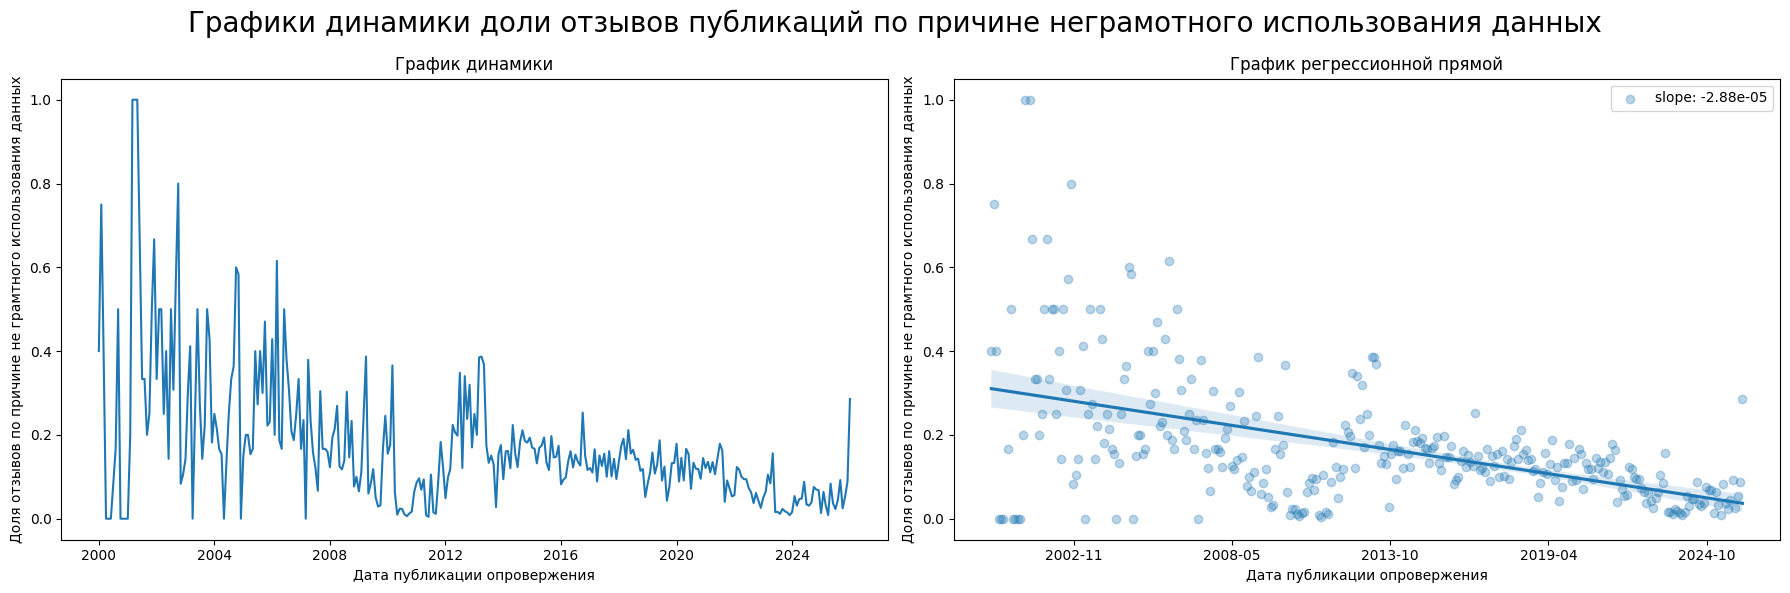

In [109]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.lineplot(ax=axes[0]
             , data=df_monthly_ratio
             , x='Month'
             , y='BadDataRatio')
axes[0].set_title('График динамики')
axes[0].set_ylabel('Доля отзывов по причине не грамтного использования данных')
axes[0].set_xlabel('Дата публикации опровержения')


sns.regplot(ax=axes[1]
             , data=df_monthly_ratio
             , x=x
             , y=y
             , scatter_kws={'alpha':0.3}
             , label=f'slope: {slope:.2e}')
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axes[1].set_xlabel('Дата публикации опровержения')
axes[1].legend()
axes[1].set_ylabel('Доля отзывов по причине не грамтного использования данных')
axes[1].set_title('График регрессионной прямой')

fig.suptitle('Графики динамики доли отзывов публикаций по причине неграмотного использования данных', fontsize=20)
fig.tight_layout()

Докажем что доля отзывов по причинам неграмоности в использовании данных отлична от нуля

In [110]:
cnt_df = df_without_reasons.copy(deep=True)
cnt_df['is_bad_data'] = cnt_df['is_bad_data'].astype('int')

In [111]:
cnt_df['RetractionDate'] = cnt_df['RetractionDate'].dt.year

/var/folders/m1/z8qkwrzs04n76tqxcvwb76dh0000gn/T/ipykernel_1106/3717026671.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cnt_df, x='RetractionDate', y='is_bad_data', palette='magma')


Text(0, 0.5, 'Доля, по причине неграмотности работы с данными')

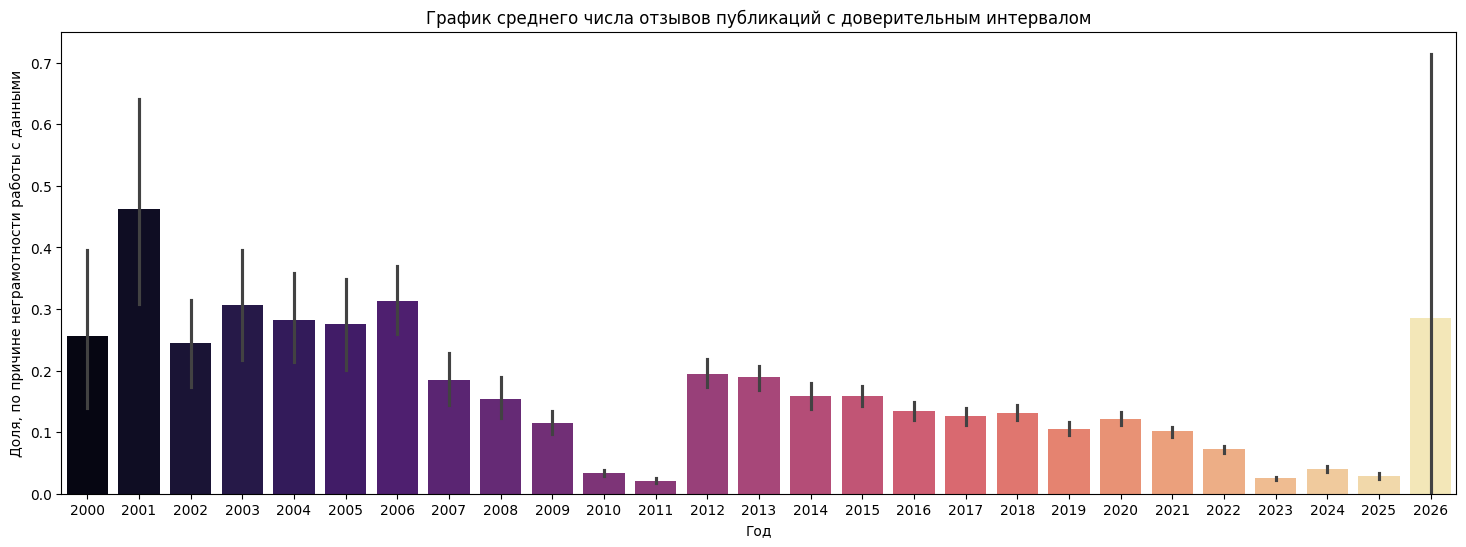

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))

sns.barplot(data=cnt_df, x='RetractionDate', y='is_bad_data', palette='magma')

axes.set_title('График среднего числа отзывов публикаций с доверительным интервалом')
axes.set_xlabel('Год')
axes.set_ylabel('Доля, по причине неграмотности работы с данными')

Далее расмотрим период в 5 лет поближе (не включая 2026 год)

/var/folders/m1/z8qkwrzs04n76tqxcvwb76dh0000gn/T/ipykernel_1106/1119256025.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cnt_df, x='RetractionDate', y='is_bad_data', palette='magma', native_scale=True, errorbar=('ci', 99))


Text(0, 0.5, 'Доля, по причине неграмотности работы с данными')

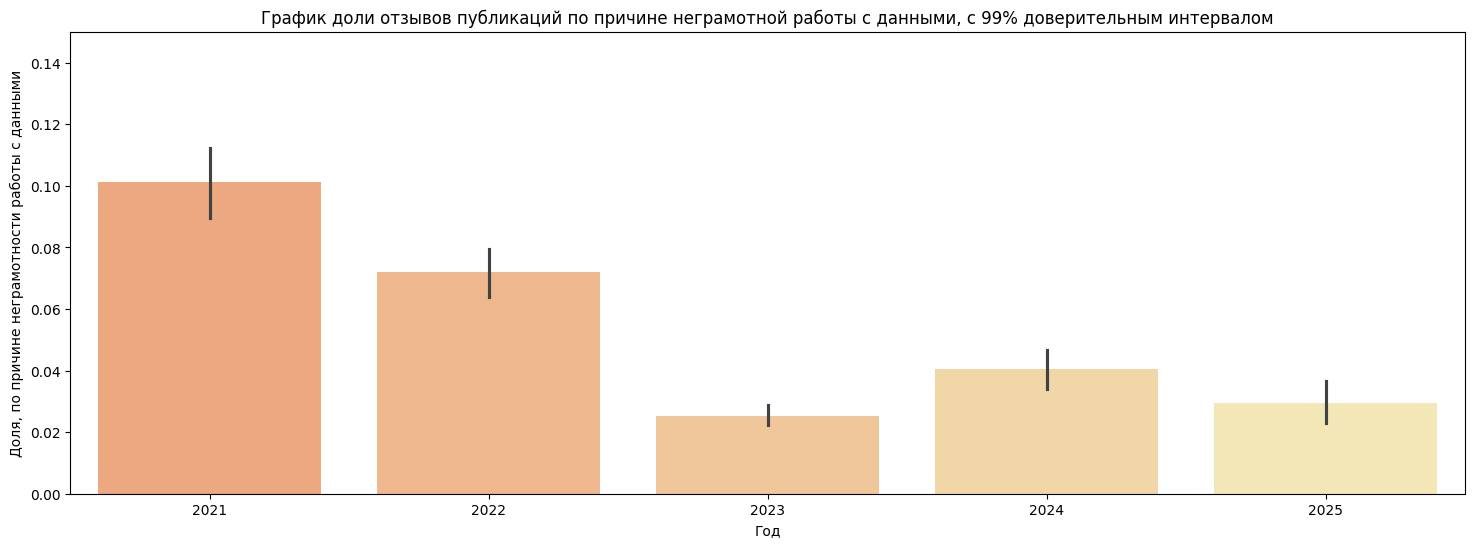

In [116]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))

sns.barplot(data=cnt_df, x='RetractionDate', y='is_bad_data', palette='magma', native_scale=True, errorbar=('ci', 99))

axes.set_xlim([2020.5, 2025.5])
axes.set_ylim([0, 0.15])

axes.set_title('График доли отзывов публикаций по причине неграмотной работы с данными, с 99% доверительным интервалом')
axes.set_xlabel('Год')
axes.set_ylabel('Доля, по причине неграмотности работы с данными')

В последний 5 лет, доля отзывов публикаций по причине неграмотности работы с данными осталась отличной от нуля (доверительный интервал не включает 0), а значит данная проблема по прежнему актуальна, хоть и не так сильно

In [64]:
my_cnt_df = cnt_df[(cnt_df['RetractionDate'] < 2026) & (cnt_df['RetractionDate'] > 2020)]

In [67]:
round(my_cnt_df['is_bad_data'].mean(), 2)

np.float64(0.05)

В последний 5 лет, отзывы по проблеме неграмотности работы с данными были в среднем в 5%

In [78]:
from scipy.stats import t, sem

cnt_data_for_stat = my_cnt_df['is_bad_data']

ci_99 = t.interval(
    0.99, 
    df=len(cnt_data_for_stat)-1, 
    loc=np.mean(cnt_data_for_stat), 
    scale=sem(cnt_data_for_stat)
)

In [79]:
ci_99

(np.float64(0.04472539080765797), np.float64(0.050515356637272274))

99% доверительный интервал не включает 0

Stack overflow

In [88]:
data = {
    'Тема': [
        'R & python (язык для анализа данных)', 
        'correlation & regression', 
        'ANOVA', 
        't-test', 
        'chi-squared-test'
    ],
    'Количество': [8741, 10552, 1277, 956, 693]
}
df = pd.DataFrame(data)

In [89]:
df

,Тема,Количество
0,R & python (язык для анализа данных),8741
1,correlation & regression,10552
2,ANOVA,1277
3,t-test,956
4,chi-squared-test,693


Text(0.5, 1.0, 'График распределения количества вопросов по основным темам')

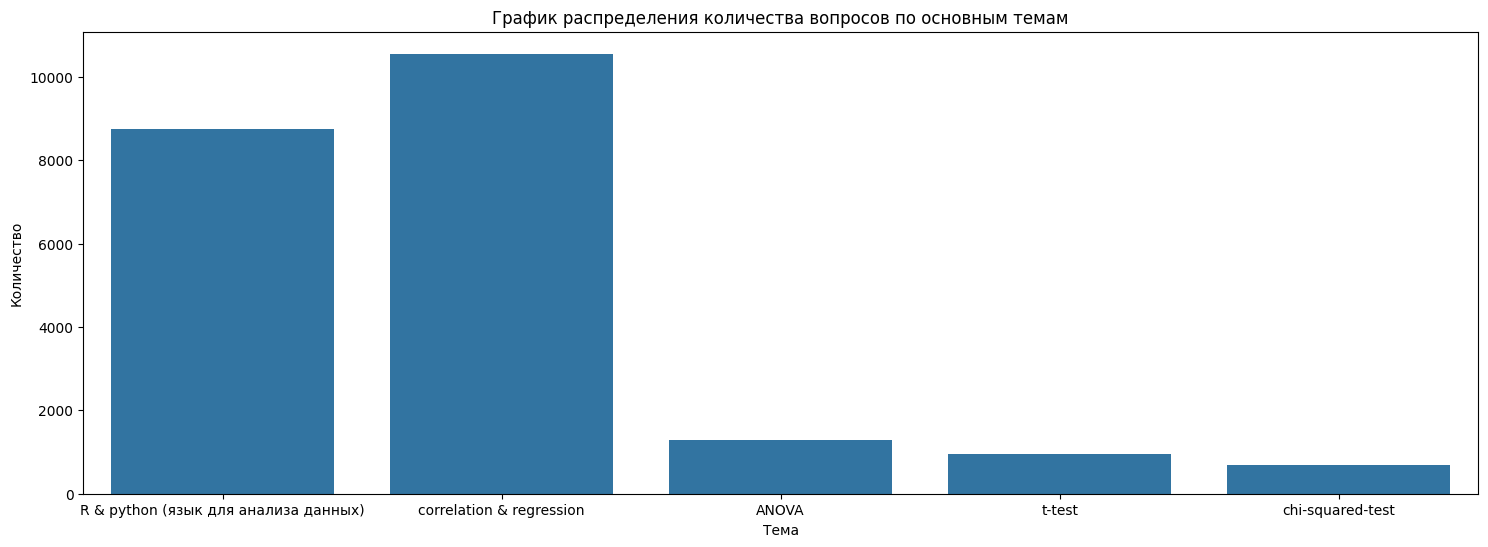

In [90]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))

sns.barplot(df, x='Тема', y='Количество')

axes.set_title('График распределения количества вопросов по основным темам')